In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the experiment
n = 8  # Size of the chessboard
z = 5  # Number of rounds
a, b = 1, 1  # Reward parameters for neighbors' behavior
y = 0.1  # Random defection probability

c_d_step_size = 0.2
x_step_size = 0.2
c_d_limit = 5

# Define the reward function
def reward(n, z, a, b, c, d, x, y):
    initial_behavior = 1  # 1 for cooperate, 0 for defect
    chessboard = np.full((n, n), initial_behavior)

    def get_neighbors(board, i, j):
        neighbors = []
        for di in [-1, 0, 1]:
            for dj in [-1, 0, 1]:
                if di == 0 and dj == 0:
                    continue
                ni, nj = i + di, j + dj
                if 0 <= ni < n and 0 <= nj < n:
                    neighbors.append(board[ni, nj])
        return neighbors

    def calculate_reward(neighbors, bot_action):
        coop_neighbors = sum(neighbors)
        defect_neighbors = len(neighbors) - coop_neighbors
        if bot_action == 1:  # Cooperate
            return (coop_neighbors * a - defect_neighbors * b) * c
        else:  # Defect
            return (coop_neighbors * a - defect_neighbors * b) * d

    total_reward = 0
    for round_num in range(z):
        new_chessboard = np.copy(chessboard)
        
        for i in range(n):
            for j in range(n):
                neighbors = get_neighbors(chessboard, i, j)
                coop_ratio = sum(neighbors) / len(neighbors)
                
                if coop_ratio >= x:
                    bot_action = 1 if np.random.rand() > y else 0
                else:
                    bot_action = 0
                
                new_chessboard[i, j] = bot_action
                total_reward += calculate_reward(neighbors, bot_action)
        
        chessboard = new_chessboard
    
    return total_reward


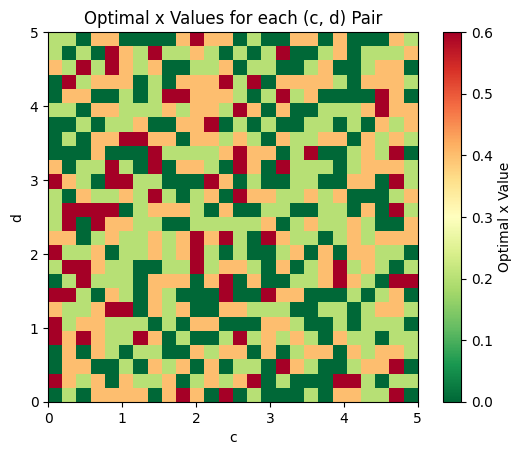

In [17]:

# Loop over c and d, and find the optimal x value for each pair
c_values = np.arange(0, c_d_limit + c_d_step_size, c_d_step_size)
d_values = np.arange(0, c_d_limit + c_d_step_size, c_d_step_size)
optimal_x_values = np.zeros((len(c_values), len(d_values)))

for i, c in enumerate(c_values):
    for j, d in enumerate(d_values):
        max_reward = float('-inf')
        best_x = None
        for x in np.arange(0, 1 + x_step_size, x_step_size):
            current_reward = reward(n, z, a, b, c, d, x, y)
            if current_reward > max_reward:
                max_reward = current_reward
                best_x = x
        optimal_x_values[i, j] = best_x

# Plotting the matrix
plt.imshow(optimal_x_values, cmap='RdYlGn_r', extent=[0, c_d_limit, 0, c_d_limit], origin='lower')
plt.colorbar(label='Optimal x Value')
plt.xlabel('c')
plt.ylabel('d')
plt.title('Optimal x Values for each (c, d) Pair')
plt.show()
